In [1]:
import gym

env = gym.make('Taxi-v3')

In [2]:
from agents.qlearning_agent import QLearningAgent
from agents.random_agent import RandomAgent

agent = QLearningAgent(env.action_space, env.observation_space)
agent = RandomAgent(env.action_space)

In [19]:
from IPython.display import clear_output
from agents.qlearning_agent import QLearningAgent

agent = QLearningAgent(env.action_space, env.observation_space)

total_penalties = 0
episodes = 1001
completions = 0

rewards_per_episode_Q = []

for episode in range(episodes):
    if episode % 100 == 0:
        clear_output(wait=True)
        print("Episode:", episode)
        
    state = env.reset()
    reward = 0
    done = False
    penalties = 0
    total_reward = 0
    # env.render()
    while not done:
        # env.render()
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update(state, action, next_state, reward)

        state = next_state
        total_reward += reward

        if reward == -10:
            penalties += 1
        
        if reward == 20:
            completions += 1

    total_penalties += penalties
    
    if episode % 10 == 0:
        rewards_per_episode_Q.append(total_reward)

print()
print("Average penalties over episode", total_penalties / episodes)
print("Completions", completions)

print(rewards_per_episode_Q)

Episode: 1000

Average penalties over episode 4.594405594405594
Completions 758
[-524, -497, -533, -272, -317, -326, -263, -290, -362, -236, -95, -77, -335, -170, -254, -335, -174, -236, -290, -272, -236, -142, -227, -184, -299, -26, -227, -129, -162, -245, -79, -11, -116, -245, -60, -281, -15, -155, -100, -220, -227, -245, -123, -224, -164, -84, -30, -1, -150, -13, -114, -144, -42, -28, -128, -238, -75, 15, -91, -128, -180, -200, 7, -206, -131, -27, -54, 7, -12, -42, -75, -24, -80, -99, -50, -131, -87, -25, -124, -5, 12, -13, -41, -10, -51, -105, 3, 8, -19, -5, 9, -74, -139, -1, 10, -78, -12, -33, -36, -62, -55]


In [20]:
from IPython.display import clear_output
from agents.random_agent import RandomAgent

agent = RandomAgent(env.action_space)

total_penalties = 0
episodes = 1001
completions = 0

rewards_per_episode_random = []

for episode in range(episodes):
    if episode % 100 == 0:
        clear_output(wait=True)
        print("Episode:", episode)
        
    state = env.reset()
    reward = 0
    done = False
    penalties = 0
    total_reward = 0
    # env.render()
    while not done:
        # env.render()
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        #agent.update(state, action, next_state, reward)

        state = next_state
        total_reward += reward

        if reward == -10:
            penalties += 1
        
        if reward == 20:
            completions += 1

    total_penalties += penalties
    
    if episode % 10 == 0:
        rewards_per_episode_random.append(total_reward)

print()
print("Average penalties over episode", total_penalties / episodes)
print("Completions", completions)

print(rewards_per_episode_random)

Episode: 1000

Average penalties over episode 63.97202797202797
Completions 44
[-803, -767, -713, -776, -776, -749, -902, -821, -740, -857, -884, -857, -758, -215, -767, -839, -713, -893, -830, -803, -884, -839, -866, -794, -704, -902, -740, -614, -839, -821, -785, -884, -794, -740, -785, -731, -785, -776, -740, -704, -803, -830, -776, -650, -803, -794, -794, -803, -704, -785, -749, -812, -704, -767, -731, -731, -830, -875, -749, -731, -695, -494, -704, -686, -731, -139, -767, -803, -686, -767, -731, -713, -812, -740, -713, -650, -731, -668, -803, -812, -767, -803, -686, -710, -695, -697, -686, -758, -695, -794, -803, -812, -758, -839, -848, -758, -731, -263, -839, -812, -758]


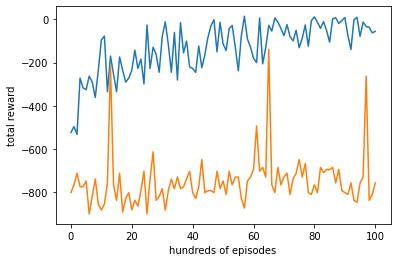

In [22]:
import matplotlib.pyplot as plt
plt.plot(rewards_per_episode_Q)
plt.plot(rewards_per_episode_random)
plt.ylabel('total reward')
plt.xlabel('hundreds of episodes')
plt.show()

In [25]:
def render_frame():
    clear_output(wait=True)
    env.render()
    print("State", state)
    print("Reward", reward)
    print("Done", done)
    sleep(.3)

In [31]:
from time import sleep

total_penalties = 0
episodes = 100
completions = 0

for episode in range(episodes):
    state = env.reset()
    reward = 0
    done = False
    penalties = 0
    # env.render()
    while not done:
        action = agent.get_policy(state)
        next_state, reward, done, info = env.step(action)
        
        state = next_state

        if reward == -10:
            penalties += 1
        
        if reward == 20:
            completions += 1

        #render_frame()
        
    total_penalties += penalties

print()
print("Average penalties over episode", total_penalties / episodes)
print("Completions", completions)


Average penalties over episode 0.0
Completions 100
